**Create pencil sketch with opencv and python**

There are mainly four steps involved:
1. Covert RGB image to grayscale image
2. Invert the grayscale image to get a negative image
3. Apply a *Gaussian* blur to the negative image (obatained from step 2)
4. Blend the grayscale image with the blureed negative (obtained at step 3) using a *color dodge*

In [4]:
# Upload image files
from google.colab import files
files.upload()

Saving Saurav_Chaurasia.jpg to Saurav_Chaurasia.jpg


{'Saurav_Chaurasia.jpg': b'\xff\xd8\xff\xe1\x01+Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x06\x01\x00\x00\x04\x00\x00\x00\x01\x00\x00\x03\xfb\x01\x01\x00\x04\x00\x00\x00\x01\x00\x00\x06U\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x00j\x01\x12\x00\x03\x00\x00\x00\x01\x00\x00\x00\x00\x012\x00\x02\x00\x00\x00\x14\x00\x00\x00V\x88%\x00\x04\x00\x00\x00\x01\x00\x00\x00\xbc\x00\x00\x00\x002019:12:07 13:27:43\x00\x00\x03\x90\x03\x00\x02\x00\x00\x00\x14\x00\x00\x00\x94\x90\x04\x00\x02\x00\x00\x00\x14\x00\x00\x00\xa8\x92\x08\x00\x04\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x002019:12:07 13:27:43\x002019:12:07 13:27:43\x00\x00\x02\x00\x07\x00\x05\x00\x00\x00\x03\x00\x00\x00\xda\x00\x1d\x00\x02\x00\x00\x00\x0b\x00\x00\x00\xf2\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x012\x00\x02\x00\x00\x00\x14\x00\x00\x01\x0f\x00\x00\x00\x002019:12:07 13:27:43\x00\xff\xe0\x00\x10JFIF\x00\x01\x01\x

In [5]:
# Step 1
# RGB to grayscale
import cv2
img_rgb = cv2.imread('/content/Antaripa.jpg')           # Read the image
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)    # Convert between color spaces

In [6]:
# An image — an array or a matrix of pixels arranged in columns and rows.
# Print the array of pixels of rgb image
print(img_rgb)

[[[ 42  37 142]
  [ 49  44 149]
  [ 48  43 152]
  ...
  [252 237 234]
  [252 237 234]
  [252 237 234]]

 [[ 30  25 130]
  [ 48  42 149]
  [ 55  50 159]
  ...
  [252 237 234]
  [252 237 234]
  [252 237 234]]

 [[ 30  25 130]
  [ 52  46 153]
  [ 62  57 166]
  ...
  [252 237 234]
  [252 237 234]
  [252 237 234]]

 ...

 [[180  83 241]
  [166  69 227]
  [170  73 231]
  ...
  [133 161 148]
  [134 162 149]
  [134 162 149]]

 [[176  79 237]
  [173  76 234]
  [173  76 234]
  ...
  [133 161 148]
  [133 161 148]
  [133 161 148]]

 [[170  73 231]
  [176  79 237]
  [174  77 235]
  ...
  [133 161 148]
  [133 161 148]
  [133 161 148]]]


In [7]:
# Shape of RGB pixel matrix
img_rgb.shape

(400, 400, 3)

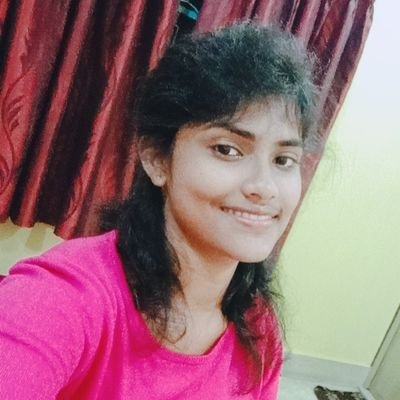

In [8]:
from google.colab.patches import cv2_imshow
cv2_imshow(img_rgb)

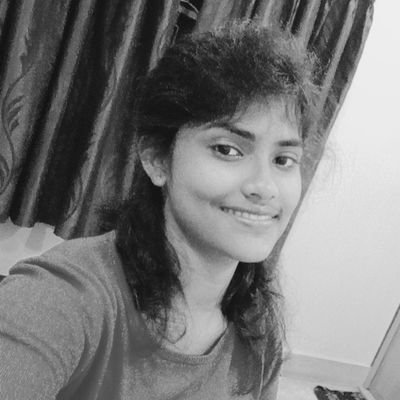

In [9]:
cv2_imshow(img_gray)

In [10]:
# Print the pixels of gray scale image
print(img_gray)

[[ 69  76  76 ... 238 238 238]
 [ 57  75  83 ... 238 238 238]
 [ 57  79  90 ... 238 238 238]
 ...
 [141 127 131 ... 154 155 155]
 [137 134 134 ... 154 154 154]
 [131 137 135 ... 154 154 154]]


In [11]:
# Shape of pixel matrix of grayscale image
img_gray.shape

(400, 400)

In [12]:
# Step 2
# Obtain negative of the image
# Inverse of grayscale image is negative because white becomes black and black becomes white
# Dafault value of grayscale image is in range [0, 255], so, negative of image can be obtained by 255 - grayscale image
img_neg = 255 - img_gray

#Shape of img_neg
img_neg.shape

(400, 400)

In [13]:
print(img_neg)

[[186 179 179 ...  17  17  17]
 [198 180 172 ...  17  17  17]
 [198 176 165 ...  17  17  17]
 ...
 [114 128 124 ... 101 100 100]
 [118 121 121 ... 101 101 101]
 [124 118 120 ... 101 101 101]]


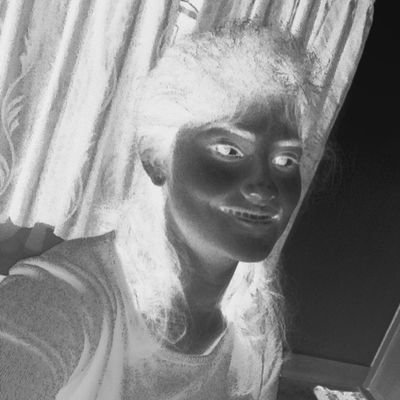

In [14]:
cv2_imshow(img_neg)

In [15]:
# Step 3
# Gaussian blur also known as smoothing of image --> reduces noise and detail in image
img_blur = cv2.GaussianBlur(img_neg, ksize=(21,21), sigmaX=0, sigmaY=0)

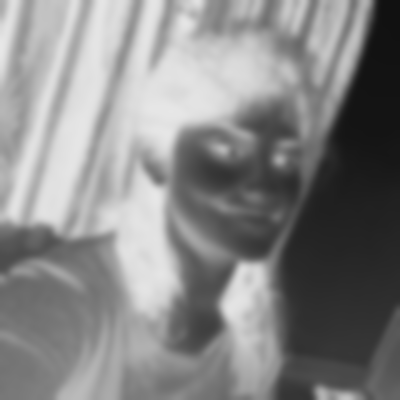

In [16]:
cv2_imshow(img_blur)

In [17]:
# Step 4
# Blend the grayscale image with blurred negative image
# Dodging and burning are the advanced techniques that were used to print an image during old days
# Dodging --> lightens an image
# Burning --> Darkens an image
# x = x*8 can be written as x<<3 (2^3 = 8), i.e. if we shift the pixel by << 8 it means, scaling it 2^8=256

def dodge(image, mask):
  return cv2.divide(image, 255-mask, scale=256)
# The above function is quivalent to (image[c,r] << 8) / (255-mask)

def burning(image, mask):
  return 255 - cv2.divide(255-image, 255-mask, scale=256)

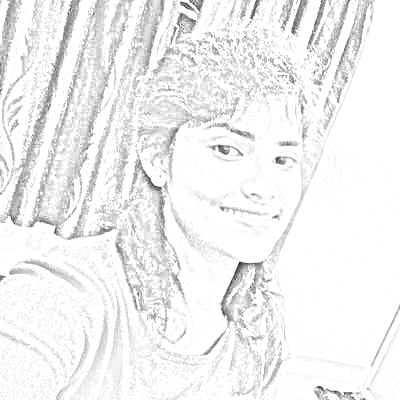

In [18]:
# Apply dodging and burning on grayscale image and blurred negative image
img_blend = dodge(img_gray, img_blur)
cv2_imshow(img_blend)

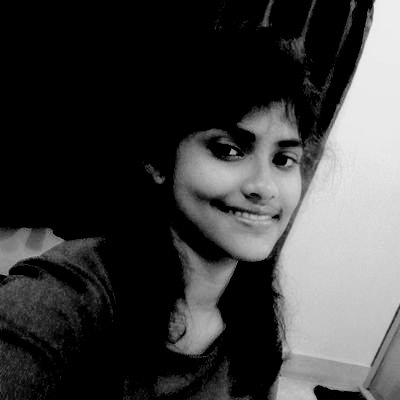

In [19]:
# Apply dodging and burning on grayscale image and blurred negative image
img_blend_ = burning(img_gray, img_blur)
cv2_imshow(img_blend_)

In [21]:
img_rgb1 = cv2.imread('/content/Family.jpeg')           # Read the image
img_gray1 = cv2.cvtColor(img_rgb1, cv2.COLOR_BGR2GRAY)
img_neg1 = 255 - img_gray1
img_blur1 = cv2.GaussianBlur(img_neg1, ksize=(21,21), sigmaX=0, sigmaY=0)
img_blend1 = dodge(img_gray1, img_blur1)

In [23]:
def ResizeWithAspectRatio(image, width=None, height=None, inter=cv2.INTER_AREA):
    dim = None
    (h, w) = image.shape[:2]

    if width is None and height is None:
        return image
    if width is None:
        r = height / float(h)
        dim = (int(w * r), height)
    else:
        r = width / float(w)
        dim = (width, int(h * r))

    return cv2.resize(image, dim, interpolation=inter)

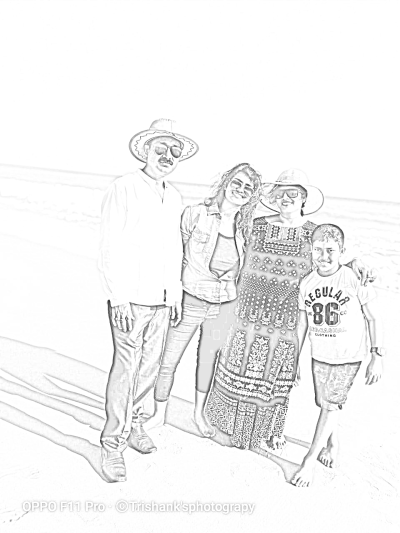

In [28]:
resize_img1 = ResizeWithAspectRatio(img_blend1, width=400, height=400)  # Resizing the image
cv2_imshow(resize_img1)

In [29]:
img_rgb2 = cv2.imread('/content/Saurav_Chaurasia.jpg')           # Read the image
img_gray2 = cv2.cvtColor(img_rgb2, cv2.COLOR_BGR2GRAY)
img_neg2 = 255 - img_gray2
img_blur2 = cv2.GaussianBlur(img_neg2, ksize=(21,21), sigmaX=0, sigmaY=0)
img_blend2 = dodge(img_gray2, img_blur2)

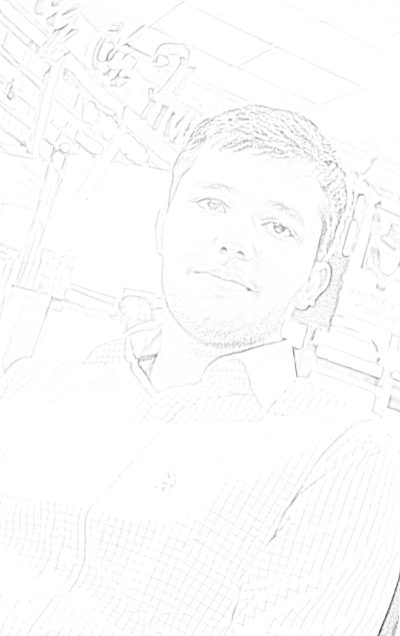

In [31]:
resize_img = ResizeWithAspectRatio(img_blend2, width=400, height=50)
cv2_imshow(resize_img)

In [32]:
img_rgb3 = cv2.imread('/content/Saudamini.jpeg')           # Read the image
img_gray3 = cv2.cvtColor(img_rgb3, cv2.COLOR_BGR2GRAY)
img_neg3 = 255 - img_gray3
img_blur3 = cv2.GaussianBlur(img_neg3, ksize=(21,21), sigmaX=0, sigmaY=0)
img_blend3 = dodge(img_gray3, img_blur3)

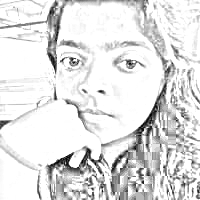

In [33]:
cv2_imshow(img_blend3)